# Analysis of the rental data

Analysis of the rental data already downloded, parsed, and converted to csv. 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
CITY_NAME = 'lausanne'

In [4]:
city_path = '../../rental_list/' + CITY_NAME + '/' 
all_rental_data_path = city_path + 'all_rental_data'
combined_data_path = all_rental_data_path + '/combined/rental_all.csv'
df = pd.read_csv(combined_data_path)

In [5]:
df.tail()

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link
838,5104296,75.0,3.5,flat,"Avenue de Sévelin, 1004 Lausanne, VD",Location d’appartement neuf,NaN,None,en/d/flat-rent-\nlausanne/5104296?s=2&t=1&l=20...
839,5125689,40.0,2.0,flat,"1012 Lausanne, VD",Appartement 2pièces à lausanne 1300.- charges ...,NaN,None,en/d/flat-rent-\nlausanne/5125689?s=2&t=1&l=20...
840,5144165,NaN,1.0,studio,"Rue Caroline 2 - Enning 3, 1003 Lausanne, VD",Sous location à usage de bureau,NaN,None,en/d/studio-rent-\nlausanne/5144165?s=2&t=1&l=...
841,5146045,106.0,3.5,flat,"1004 Lausanne, VD",Au centre ville,NaN,None,en/d/flat-rent-\nlausanne/5146045?s=2&t=1&l=20...
842,5159698,28.0,1.0,studio,"1018 Lausanne, VD",Studio meublé à louer ecublens,NaN,None,en/d/studio-rent-\nlausanne/5159698?s=2&t=1&l=...


In [6]:
df['Id'].value_counts()[df['Id'].value_counts() > 1]

5170621    2
Name: Id, dtype: int64

## New useful features

In [7]:
# price per room and price per surface area
df['RentPerArea'] = df['Rent'] / df['SurfaceArea']
df['RentPerRoom'] = df['Rent'] / df['NumRooms']
df['AreaPerRoom'] = df['SurfaceArea'] / df['NumRooms']

## Outliers

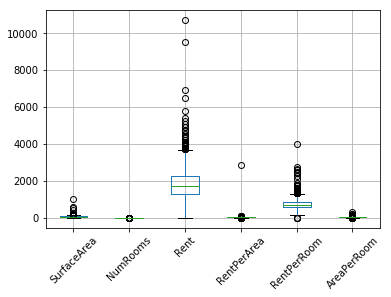

In [8]:
df.drop('Id', axis = 1).boxplot(rot = 45)

In [9]:
def get_whiskers(df, col, WHIS):
    des = df.describe()
    q1 = des[col]['25%']
    q3 = des[col]['75%']
    iqr = q3 - q1
    return [q1 - WHIS * iqr, q3 + WHIS * iqr]

**Surface Area outliers**

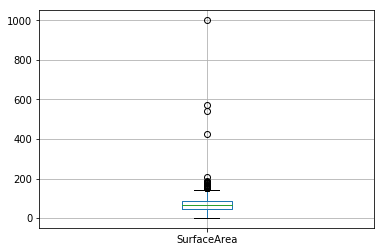

In [10]:
df[['SurfaceArea']].boxplot()

In [11]:
area_whiskers = get_whiskers(df, 'SurfaceArea', WHIS=3.5)  # WHIS value is adjusted based on the manual study of the outliers
area_whiskers

[-94.0, 226.0]

In [12]:
area_outliers = (df['SurfaceArea'] > area_whiskers[1]) | (df['SurfaceArea'] < area_whiskers[0])
area_outliers.sum() # how many area outliers?

4

In [13]:
df[area_outliers]

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,RentPerArea,RentPerRoom,AreaPerRoom
236,5138995,572.0,3.0,flat,"Chemin de Contigny 9, 1007 Lausanne, VD","Apartment a Lausanne (3 pieces, renove en 2016)",1560.0,None,en/d/flat-rent-\nlausanne/5138995?s=2&t=1&l=20...,2.727273,520.000000,190.666667
558,4984514,423.0,11.0,flat,"Chemin de Praz-Buchilly 103, 1000 Lausanne, VD",En bordure de Golf - Luxueux attique avec terr...,9500.0,None,en/d/flat-rent-\nlausanne/4984514?s=2&t=1&l=20...,22.458629,863.636364,38.454545
559,5141933,540.0,11.0,flat,"1000 Lausanne, VD",Superbe duplex de 11 pièces à louer !,10700.0,None,en/d/flat-rent-\nlausanne/5141933?s=2&t=1&l=20...,19.814815,972.727273,49.090909
604,5124217,1000.0,3.0,single-room,"foret 4b, 1018 Lausanne, VD",Colocation dans un 3 pieces Lausanne,1000.0,None,en/d/single-room-rent-\nlausanne/5124217?s=2&t...,1.000000,333.333333,333.333333


Looking at the above data, it looks like that we can capture the outliers by RentPerArea rather than area itself. 

**Rent per Area Outliers**:

In [14]:
rentPerArea_whiskers = get_whiskers(df, 'RentPerArea', WHIS=1.5)
rentPerArea_whiskers

[12.174152387691478, 45.420450292326834]

I adjust these values manually, as it seems that having a price greater than ~45 is not unusual for rooms for example. 

In [15]:
# manual adjustment
rentPerArea_whiskers = [15, 80]

In [19]:
rentPerArea_outliers = (df['RentPerArea'] > rentPerArea_whiskers[1]) | (df['RentPerArea'] < rentPerArea_whiskers[0])
print(rentPerArea_outliers.sum())
df[rentPerArea_outliers].head()

29


,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,RentPerArea,RentPerRoom,AreaPerRoom
22,5169889,104.0,4.5,flat,"1005 Lausanne, VD",Location appartement meublé à Lausanne-Pully p...,1430.0,None,en/d/flat-rent-\nlausanne/5169889?s=2&t=1&l=20...,13.750000,317.777778,23.111111
62,5096775,50.0,1.0,penthouse,"1007 Lausanne, VD",Sous location du 20 au 28 octobre SEULEMENT,400.0,None,en/d/penthouse-rent-\nlausanne/5096775?s=2&t=1...,8.000000,400.000000,50.000000
63,5180893,48.0,2.0,flat,"Ch. de la Forêt 1, 1018 Lausanne, VD","Appartement Subventionné 2 pièces, 48m2",626.0,New,en/d/flat-rent-\nlausanne/5180893?s=2&t=1&l=20...,13.041667,313.000000,24.000000
64,5170719,60.0,3.0,single-room,"1004, 1004 Lausanne, VD",Une grande chambre libre sous-location 1.oct 7...,700.0,None,en/d/single-room-rent-\nlausanne/5170719?s=2&t...,11.666667,233.333333,20.000000
70,5169368,76.0,3.0,single-room,"Av. de Tivoli 30, 1007 Lausanne, VD","Chambre 11 m2 dans collocation à Tivoli, Lausa...",762.0,None,en/d/single-room-rent-\nlausanne/5169368?s=2&t...,10.026316,254.000000,25.333333


### What are the sources of outliers? 

The source of outliers here is mostely human mistake. Either numbers are entered in wrong fields or the price is for a week (from the description for example) or the price is for a room but total number of rooms is entered. Have a look at the examples below:

In [20]:
df['Description'][74]

'Logement vacances : appartement 2p à louer 800.-/semaine'

In [21]:
df['Description'][635]

'Cherche un(e) colocataire sur Lausanne - superbe appartement'

We will be removing the outliers, that appeared above; manually checking, most of them involve some sort of human error. We could make this removal of outliers more accurate, for instance by looking at the description field and looking for phrases such as "per room" or "per week" (in English or French, for example). 

### Remove outliers

In [22]:
# Remove Rent per Area outliers
df = df.drop(df[rentPerArea_outliers].index).reset_index()

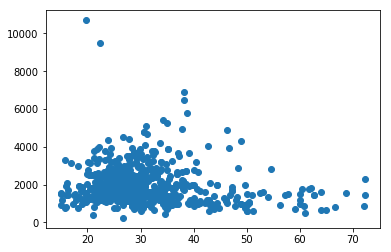

In [23]:
plt.scatter(x = df['RentPerArea'], y = df['Rent'])

In [24]:
#df.drop((df[(df['RentPerArea'] > 2000)].index), axis = 0, inplace=True)

#df.reset_index(inplace=True)

## Some statistical info

In [25]:
stats = df.describe()
stats

,index,Id,SurfaceArea,NumRooms,Rent,RentPerArea,RentPerRoom,AreaPerRoom
count,814.000000,8.140000e+02,718.000000,814.000000,804.000000,709.000000,804.000000,718.000000
mean,422.858722,5.079693e+06,69.488858,2.705160,1917.101990,30.615453,770.999043,26.524333
std,243.243036,2.164614e+05,40.270518,1.280586,957.381064,9.162784,333.688591,12.105472
min,0.000000,1.806661e+06,8.000000,1.000000,1.000000,15.000000,0.500000,2.857143
25%,214.250000,5.079133e+06,45.000000,2.000000,1357.500000,25.263158,583.214286,21.428571
50%,420.500000,5.141456e+06,65.000000,2.500000,1720.000000,28.692308,697.464286,24.253968
75%,637.750000,5.163374e+06,86.000000,3.500000,2296.250000,33.214286,875.000000,28.000000
max,842.000000,5.181160e+06,540.000000,11.000000,10700.000000,72.281250,3990.000000,180.000000


In [26]:
stats['Rent']['mean']

1917.1019900497513

In [27]:
stats.Rent

count      804.000000
mean      1917.101990
std        957.381064
min          1.000000
25%       1357.500000
50%       1720.000000
75%       2296.250000
max      10700.000000
Name: Rent, dtype: float64

In [28]:
print("The mean rental price in {} is {:0.5} CHF per month.".format(CITY_NAME.capitalize(), stats['Rent']['mean']))

The mean rental price in Lausanne is 1917.1 CHF per month.


In [29]:
print("The mean rental price per room in {} is {:0.5} CHF per month.".format(CITY_NAME.capitalize(), stats['RentPerRoom']['mean']))

The mean rental price per room in Lausanne is 771.0 CHF per month.


In [30]:
print("The mean rental price per meter square in {} is {:0.5} CHF per month.".format(CITY_NAME.capitalize(), stats['RentPerArea']['mean']))

The mean rental price per meter square in Lausanne is 30.615 CHF per month.


## Rent and Zip Code

### Extract Zip Code from Address

In [31]:
CITY_NAME_C = CITY_NAME.capitalize()

In [32]:
def Extract_zip_code(address):
    n = len(address)
    l = len("Lausanne, VD")
    return int(address[-l - 5: - l -1])

In [33]:
(df[df['Id'].index == 337]).index

Int64Index([337], dtype='int64')

In [34]:
for i in range(0, df.shape[0]):
    address = df['Address'][i]
    Extract_zip_code(address)

In [35]:
df['ZipCode'] = df['Address'].map(lambda x: Extract_zip_code(x))

In [36]:
df.head(2)

,index,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,RentPerArea,RentPerRoom,AreaPerRoom,ZipCode
0,0,5109473,63.0,3.0,flat,"Ch. du Devin 31A, 1012 Lausanne, VD",Appartement de 3 pièces au rez inf. Niv. -2,1490.0,None,en/d/flat-rent-\nlausanne/5109473?s=2&t=1&l=20...,23.650794,496.666667,21.0,1012
1,1,4538993,47.0,2.0,flat,"Chemin du Devin 31 D, 1012 Lausanne, VD",Appartement de 2 pièces au Niv. -5,1230.0,New,en/d/flat-rent-\nlausanne/4538993?s=2&t=1&l=20...,26.170213,615.000000,23.5,1012


In [37]:
zipVsRentMean = df[['ZipCode', 'RentPerArea', 'RentPerRoom', 'AreaPerRoom', 'SurfaceArea']]\
                .groupby(['ZipCode'], as_index = False).mean()

In [38]:
zipVsRentCount = df[['ZipCode', 'RentPerArea', 'RentPerRoom', 'AreaPerRoom']].groupby(['ZipCode'], as_index = False).count()

In [39]:
zipVsRentMean

,ZipCode,RentPerArea,RentPerRoom,AreaPerRoom,SurfaceArea
0,1000,28.142748,764.911846,27.661212,153.500000
1,1003,34.224370,991.907961,30.819269,78.926471
2,1004,29.194720,717.545759,25.997881,69.063492
3,1005,29.667280,743.246468,25.231655,74.863636
4,1006,33.037358,809.693705,26.715268,60.169231
5,1007,32.617429,799.282293,26.785694,60.912500
6,1010,28.675953,735.334807,26.639470,78.866667
7,1012,31.128687,828.476992,27.414220,71.382716
8,1015,NaN,650.000000,NaN,NaN
9,1018,29.259452,679.349340,24.191839,57.565657


In [40]:
import seaborn as sns

In [41]:
dftmp = df[(df['ZipCode'] != 1000) & (df['ZipCode'] != 1015)]

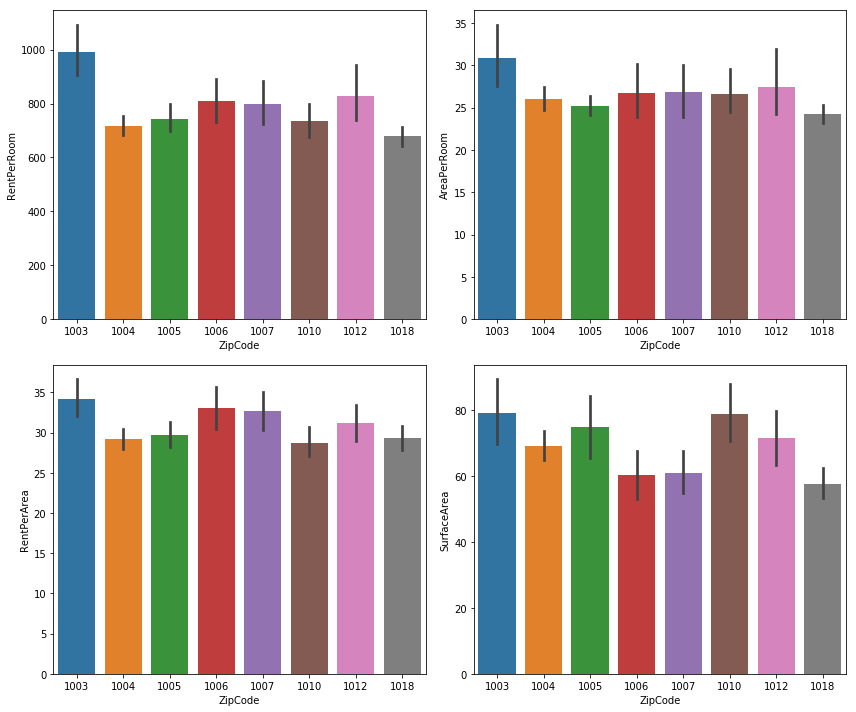

In [42]:
f, ax = plt.subplots(2, 2, figsize = (12, 10))
plt.subplot(2, 2, 1)
sns.barplot(x = 'ZipCode', y = 'RentPerRoom', data = dftmp)
plt.subplot(2, 2, 2)
sns.barplot(x = 'ZipCode', y = 'AreaPerRoom', data = dftmp)
plt.subplot(2, 2, 3)
sns.barplot(x = 'ZipCode', y = 'RentPerArea', data = dftmp)
plt.subplot(2, 2, 4)
sns.barplot(x = 'ZipCode', y = 'SurfaceArea', data = dftmp)
plt.tight_layout()